In [80]:
import pandas as pd
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("First 5 rows of the datasheet;")
print(data.head(5))


First 5 rows of the datasheet;
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

In [81]:

# Checking the structure and type of values in the data
print("\nDataset information:")
print(data.info())
print("\nNull values in each column:")
print(data.isnull().sum())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

In [82]:

# Dropping additional features for initial visualization
features = data.drop(['Attrition', 'EmployeeNumber'], axis=1)
output = data['Attrition']


In [83]:
print("First 5 rows of the datasheet;")
print(features.head(5))


First 5 rows of the datasheet;
   Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction  Gender  ...  RelationshipSatisfaction  \
0                        2  Female  ...                         1   
1                        3    Male  ...                      

In [84]:
print(output.head(5))

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object


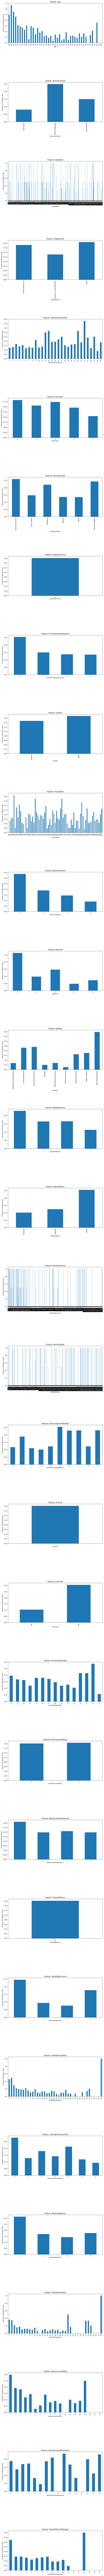

In [85]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(12, 10 * len(features.columns)))

for i, feature in enumerate(features.columns):
    ax = axs[i]
    fractions = data.groupby(feature)['Attrition'].value_counts(normalize=True).unstack().fillna(0)['Yes']
    fractions.plot(kind='bar', ax=ax)
    ax.set_title(f'Feature: {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Fraction of Attrition (Yes)')

plt.subplots_adjust(hspace=1)
plt.show()


In [86]:

# Dropping less useful features
data = data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)


In [87]:
print(data.head(5))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1     

In [88]:
print(features.head(5))


   Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction  Gender  ...  RelationshipSatisfaction  \
0                        2  Female  ...                         1   
1                        3    Male  ...                         4   
2                      

In [89]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Encoding categorical data using OneHotEncoder
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Attrition')

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenating the encoded features with numerical features
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
data_encoded = pd.concat([data[numerical_cols], encoded_df], axis=1)

# Encoding the target variable
label_encoder = LabelEncoder()
data_encoded['Attrition'] = label_encoder.fit_transform(data['Attrition'])

# Scaling the features
feature_data = data_encoded.drop(columns=['Attrition'])
target = data_encoded['Attrition']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_data)
scaled_feature_data = pd.DataFrame(scaled_features, columns=feature_data.columns)
scaled_feature_data = pd.concat([scaled_feature_data, target], axis=1)

print(scaled_feature_data.head(5))



        Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0  0.446350   0.742527         -1.010909  -0.891688       -1.701283   
1  1.322365  -1.297775         -0.147150  -1.868426       -1.699621   
2  0.008343   1.414363         -0.887515  -0.891688       -1.696298   
3 -0.429664   1.461466         -0.764121   1.061787       -1.694636   
4 -1.086676  -0.524295         -0.887515  -1.868426       -1.691313   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                -0.660531    1.383138        0.379672 -0.057788   
1                 0.254625   -0.240677       -1.026167 -0.057788   
2                 1.169781    1.284725       -1.026167 -0.961486   
3                 1.169781   -0.486709        0.379672 -0.961486   
4                -1.575686   -1.274014        0.379672 -0.961486   

   JobSatisfaction  ...  JobRole_Research Director  \
0         1.153254  ...                  -0.239904   
1        -0.660853  ...                  -0.239904   
2 

In [90]:
print("number of columns in data set")
print(len(data.columns))
print("number of columns in data_en set")
print(len(data_encoded.columns))

number of columns in data set
32
number of columns in data_en set
53


In [91]:

# Dropping redundant columns after one-hot encoding
scaled_feature_data = scaled_feature_data.drop(['Gender_Female', 'OverTime_No'], axis=1)



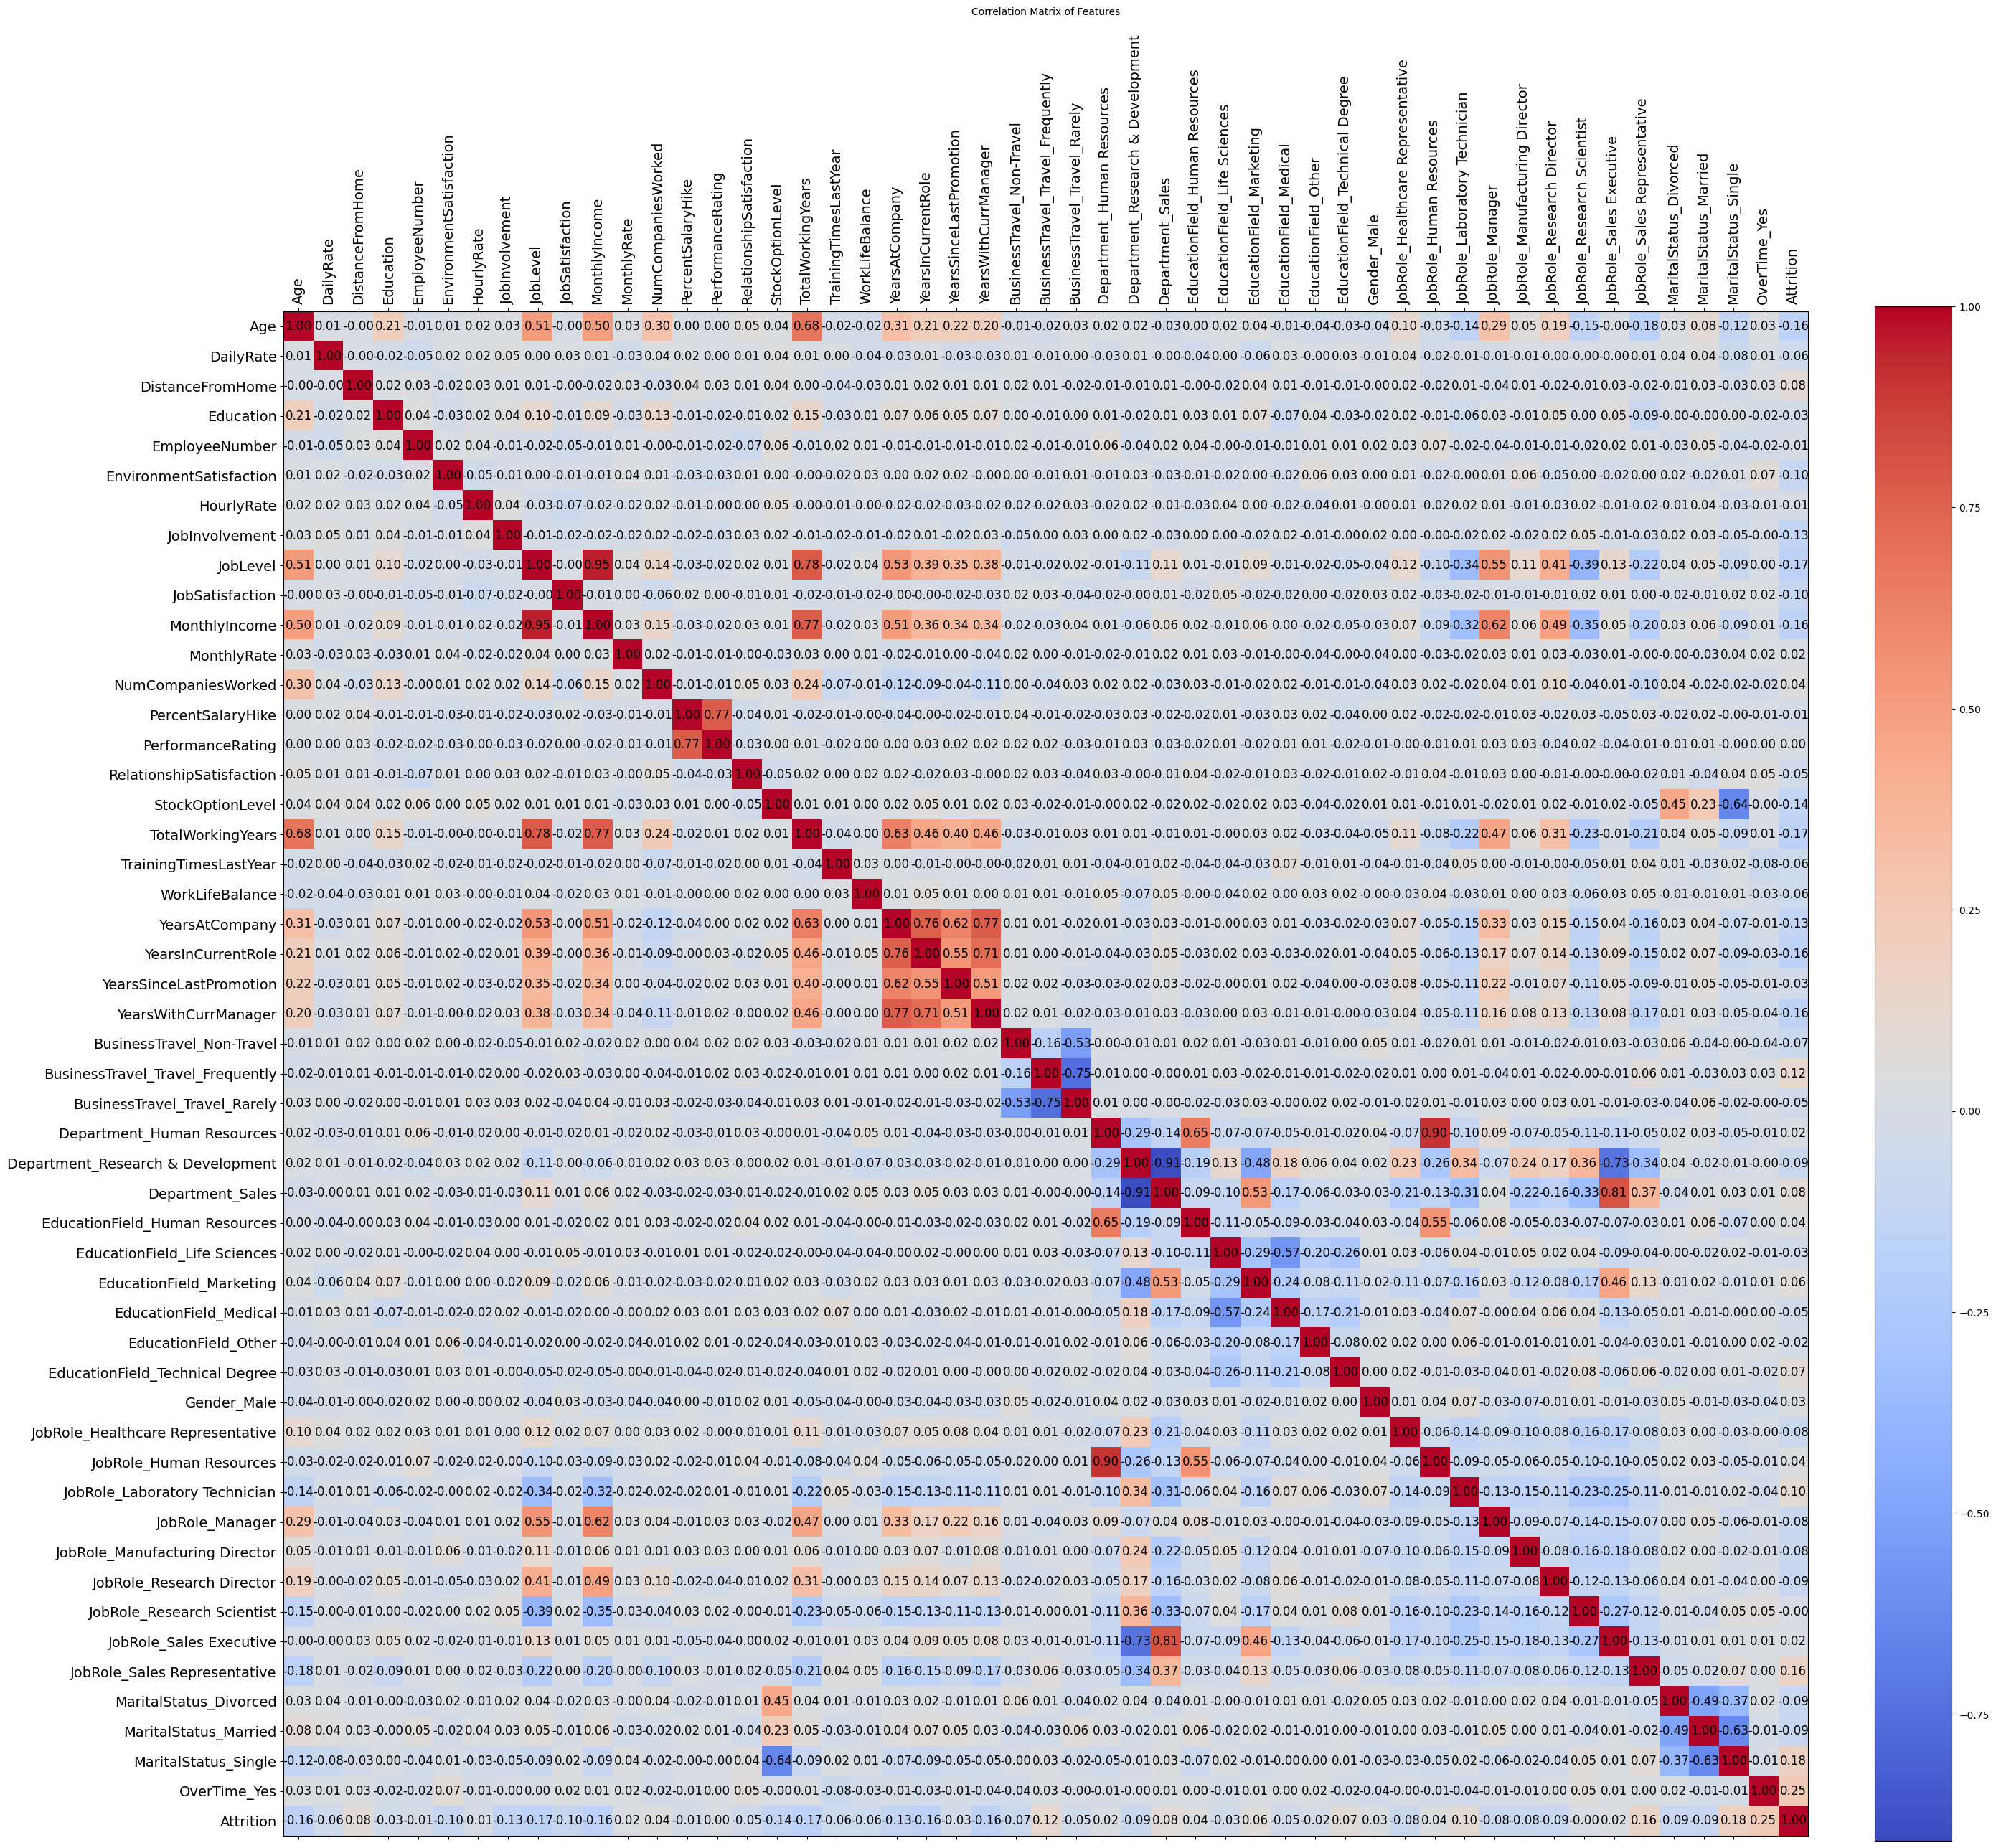

In [92]:

import numpy as np

# Assuming `scaled_feature_data` is already defined as in your previous steps
# Create a correlation matrix
correlation_matrix = scaled_feature_data.corr()

# Set figure size based on the number of columns
fig, ax = plt.subplots(figsize=(30, 30))

# Displaying the correlation matrix with enhanced visualization using Matplotlib
heatmap = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add color bar
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, fontsize=14)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=14)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=12)

plt.title('Correlation Matrix of Features', fontsize=10, pad=20)
plt.show()


In [93]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost
from sklearn.naive_bayes import GaussianNB
# Splitting the data into training and testing sets
X = scaled_feature_data.drop('Attrition', axis=1)
y = scaled_feature_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(f"\nShape of training set: {X_train.shape}")
print(f"Shape of testing set: {X_test.shape}")




Shape of training set: (1176, 50)
Shape of testing set: (294, 50)


In [94]:

# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_predictions = lg.predict(X_test)

# Accuracy of Logistic Regression
lg_accuracy = accuracy_score(y_test, lg_predictions)
print("\nLogistic Regression")
print(f"Accuracy: {lg_accuracy:.4f}")

# Confusion Matrix for Logistic Regression
confmat = confusion_matrix(y_test, lg_predictions)
print("Confusion Matrix:")
print(confmat)
print("Classification Report:")
print(classification_report(y_test, lg_predictions))



Logistic Regression
Accuracy: 0.8844
Confusion Matrix:
[[242  13]
 [ 21  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



In [95]:

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Accuracy of Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nDecision Tree Classifier")
print(f"Accuracy: {dt_accuracy:.4f}")

# Confusion Matrix for Decision Tree Classifier
confmat = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix:")
print(confmat)
print("Classification Report:")
print(classification_report(y_test, dt_predictions))




Decision Tree Classifier
Accuracy: 0.7585
Confusion Matrix:
[[215  40]
 [ 31   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       255
           1       0.17      0.21      0.18        39

    accuracy                           0.76       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.76      0.77       294



In [96]:

# Random Forest Classifier with Grid Search for hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, None]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nRandom Forest Classifier")
print("Best parameters found: ", best_params)

rfc = RandomForestClassifier(random_state=42, **best_params)
rfc.fit(X_train, y_train)
rf_predictions = rfc.predict(X_test)

# Accuracy of Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {rf_accuracy:.4f}")

# Confusion Matrix for Random Forest Classifier
confmat = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:")
print(confmat)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


# Identifying top 5 key predictors
feature_importances = rfc.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 5 key predictors:")
print(importance_df.head(5))



Random Forest Classifier
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy: 0.8741
Confusion Matrix:
[[253   2]
 [ 35   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294


Top 5 key predictors:
           Feature  Importance
10   MonthlyIncome    0.071901
49    OverTime_Yes    0.059376
1        DailyRate    0.050496
4   EmployeeNumber    0.049262
0              Age    0.048888


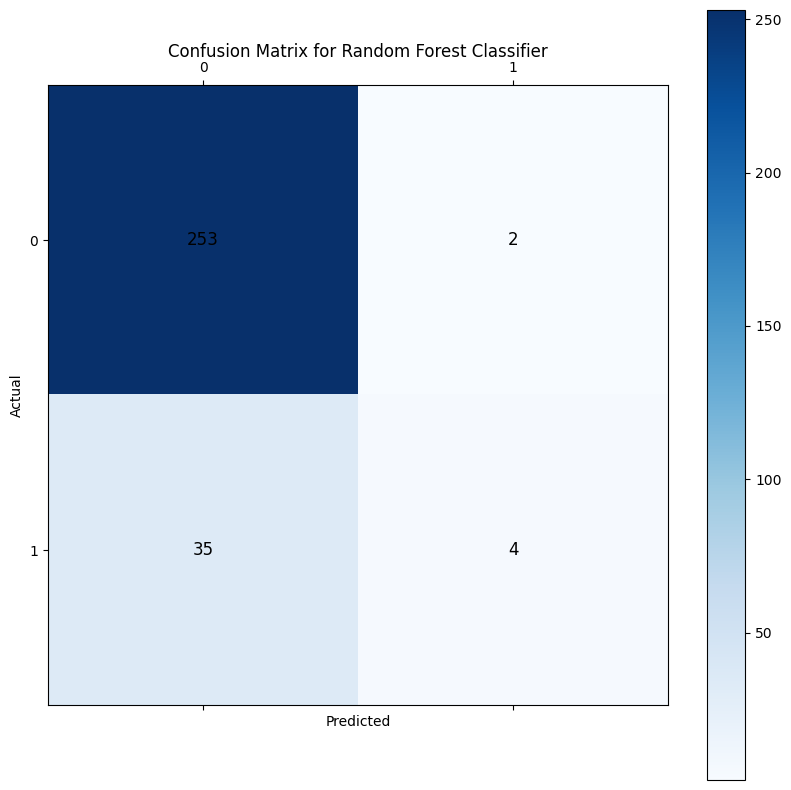

In [97]:

# Plotting the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(confmat, cmap='Blues')

# Adding color bar
plt.colorbar(cax)

# Setting x and y labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Adding titles
ax.set_title('Confusion Matrix for Random Forest Classifier', pad=20)

# Annotating the confusion matrix
for (i, j), val in np.ndenumerate(confmat):
    plt.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=12)

# Displaying the plot
plt.show()


In [98]:

# XGBoost Classifier
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20],
    'max_depth': [3, 4, 5, 6, 8, 10, 12],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}
xgc = xgboost.XGBClassifier()
random_search = RandomizedSearchCV(xgc, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("\nXGBoost Classifier")
print("Best parameters found: ", best_params)

xg = xgboost.XGBClassifier(**best_params)
xg.fit(X_train, y_train)
xg_predictions = xg.predict(X_test)

# Accuracy of XGBoost Classifier
xg_accuracy = accuracy_score(y_test, xg_predictions)
print(f"Accuracy: {xg_accuracy:.4f}")

# Confusion Matrix for XGBoost Classifier
confmat = confusion_matrix(y_test, xg_predictions)
print("Confusion Matrix:")
print(confmat)
print("Classification Report:")
print(classification_report(y_test, xg_predictions))


# Identifying top 5 key predictors
feature_importances = xg.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 5 key predictors:")
print(importance_df.head(5))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.883 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.773 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.816 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.821 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7;, score=0.857 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.865 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5;, score=0.767 total time=   0.2s
[CV 3/5] END colsample_by

In [99]:

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

# Accuracy of Naive Bayes Classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nNaive Bayes Classifier")
print(f"Accuracy: {nb_accuracy:.4f}")

# Confusion Matrix for Naive Bayes Classifier
confmat = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix:")
print(confmat)
print("Classification Report:")
print(classification_report(y_test, nb_predictions))



Naive Bayes Classifier
Accuracy: 0.6701
Confusion Matrix:
[[173  82]
 [ 15  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       255
           1       0.23      0.62      0.33        39

    accuracy                           0.67       294
   macro avg       0.57      0.65      0.56       294
weighted avg       0.83      0.67      0.72       294



In [101]:
print("Summary of the Attrition Analysis and Prediction Project\n")

print("In this project, we focused on analyzing and predicting employee attrition at Acme Corporation. The primary objective was to gain insights into the factors affecting employee turnover and predict which employees might leave.\n")

print("Data Exploration and Preprocessing:\n")
print("The project began with a detailed dataset comprising employee demographics, job satisfaction, work environment, performance metrics, and turnover status.")
print("Initial data exploration confirmed that the dataset was clean and free of missing values.")
print("Data visualization revealed trends and patterns, showing how variables like age, job role, and job satisfaction impacted attrition rates.\n")

print("Data Encoding and Scaling:\n")
print("Categorical variables were converted using one-hot encoding, and the target variable, Attrition, was label encoded.")
print("Feature scaling was performed using StandardScaler to ensure uniform contribution from all features in the model.\n")

print("Correlation Matrix:\n")
print("A correlation matrix was created to understand the relationships between features, identify multicollinearity, and select significant features for modeling.\n")

print("Model Training and Evaluation:\n")
print("Multiple machine learning models were trained: Logistic Regression, Decision Tree, Random Forest, XGBoost, and Naive Bayes.")
print("Hyperparameter tuning was conducted using GridSearchCV or RandomizedSearchCV.")
print("Model performance was evaluated through accuracy scores, confusion matrices, and classification reports.\n")

print("Insights and Recommendations:\n")
print("Key predictors of attrition included job level, overtime, job level,stock option level, year with curr manager and monthly income.")
print("Random Forest and Logistic Regression models demonstrated high accuracy.")
print("Recommendations include integrating these models into Acme Corporation’s HR system to identify at-risk employees and implement targeted retention strategies such as career development plans, job satisfaction initiatives, and better workload management.\n")

print("Conclusion:\n")
print("This project illustrates the effectiveness of data analytics and machine learning in addressing business challenges.")
print("Acme Corporation can leverage these tools to reduce employee turnover and enhance workforce stability through data-driven decisions.")


Summary of the Attrition Analysis and Prediction Project

In this project, we focused on analyzing and predicting employee attrition at Acme Corporation. The primary objective was to gain insights into the factors affecting employee turnover and predict which employees might leave.

Data Exploration and Preprocessing:

The project began with a detailed dataset comprising employee demographics, job satisfaction, work environment, performance metrics, and turnover status.
Initial data exploration confirmed that the dataset was clean and free of missing values.
Data visualization revealed trends and patterns, showing how variables like age, job role, and job satisfaction impacted attrition rates.

Data Encoding and Scaling:

Categorical variables were converted using one-hot encoding, and the target variable, Attrition, was label encoded.
Feature scaling was performed using StandardScaler to ensure uniform contribution from all features in the model.

Correlation Matrix:

A correlation ma